## Import important libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

## Load MNIST dataset and make train test split

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Show the sample image

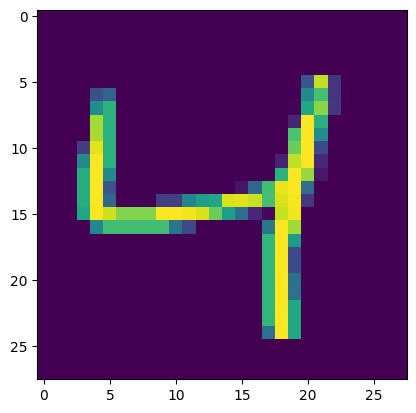

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

## Make number in range from 0 to 1

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Make a ANN model (sequential model)

In [10]:
model = Sequential()

# convert high dimenssion array in 1-D
model.add(Flatten(input_shape=(28,28)))

# layer-1
model.add(Dense(128,activation='relu'))
# layer-2
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

sparse_categorical_crossentropy me labels ko OHE nahi karna padta

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2843 - accuracy: 0.9159 - val_loss: 0.1436 - val_accuracy: 0.9582
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1221 - accuracy: 0.9626 - val_loss: 0.1281 - val_accuracy: 0.9624
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.1007 - val_accuracy: 0.9702
Epoch 4/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0951 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.1028 - val_accuracy: 0.9725
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.1078 - val_accuracy: 0.9725
Epoch 7/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.1160 - val_accuracy

## Make prediction

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

## Plot the graphs

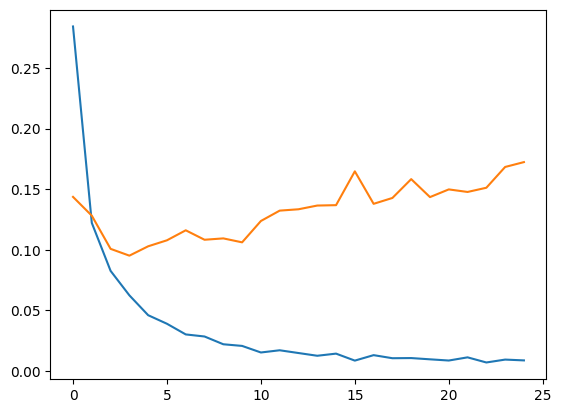

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

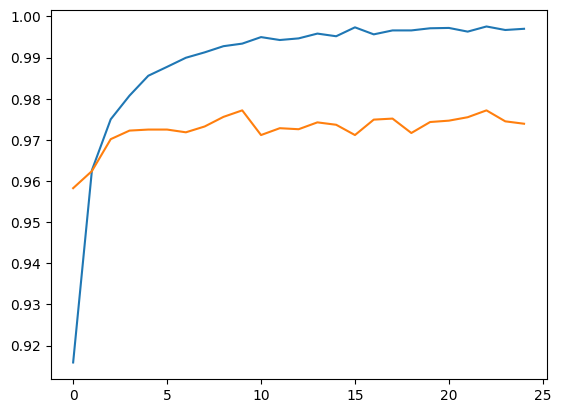

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

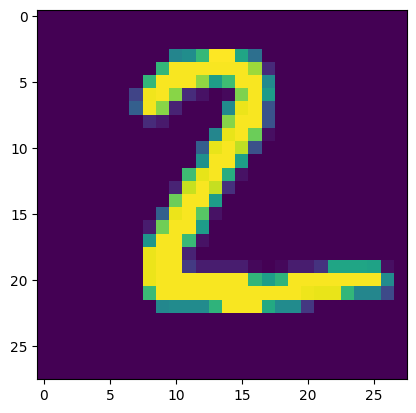

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 30ms/step


array([2])